## Chap 6. Neural Network

----

Conda env : [cv_playgrounds](../../../README.md#setup-a-conda-environment)

----

In [ ]:
# @title 6.1 Pytorch - tensor
import torch


print(f"torch version : {torch.__version__}")

#
print("\n--torch tensor")
x = torch.tensor(5.0, requires_grad=True) # default value or requires_grad = FALSE
y = 3 * x ** 2
print(y)

y.backward()
print(x.grad)



torch version : 2.6.0+cu124

--torch tensor
tensor(75., grad_fn=<MulBackward0>)
tensor(30.)

--rosebrck function


In [ ]:
# @title 6.1 Pytorch-Gradient

import torch

def rosenbrock(x0, x1):
    y = 100*(x1 - x0 **2)**2 + (x0 - 1)**2
    return y

print("\nTest Rosenbrock function")
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)
y = rosenbrock(x0, x1)
y.backward()
print(f"x0      : {x0}, x1: {x1}")
print(f"y       : {y}")
print(f"x0.grad : {x0.grad}")
print(f"x1.grad : {x1.grad}")

# Without x0.grad.zero_(), x1.grad.zero_()
x0.data += 1
x1.data += 2
y = rosenbrock(x0, x1)
y.backward()
print("\n Without grad.zero_()")
print(f"x0      : {x0}, x1: {x1}")
print(f"y       : {y}")
print(f"x0.grad : {x0.grad}")
print(f"x1.grad : {x1.grad}")


x0 = torch.tensor(1.0, requires_grad=True)
x1 = torch.tensor(4.0, requires_grad=True)
y = rosenbrock(x0, x1)
y.backward()
print("\n Reinitialize x0 and x1")
print(f"x0      : {x0}, x1: {x1}")
print(f"y       : {y}")
print(f"x0.grad : {x0.grad}")
print(f"x1.grad : {x1.grad}")

# ----
print("\nSoliving Rosenbrock function")
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)
iters = 10000
lr = 0.001

for i in range(iters):
    # if i % 100 == 0:
    #     print(x0.item(), x1.item())
    y = rosenbrock(x0, x1)
    y.backward()
    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data
    x0.grad.zero_()
    x1.grad.zero_()

print(f"x0 : {x0.item()}")
print(f"x1 : {x1.item()}")




Test Rosenbrock function
x0      : 0.0, x1: 2.0
y       : 401.0
x0.grad : -2.0
x1.grad : 400.0

 Without grad.zero_()
x0      : 1.0, x1: 4.0
y       : 900.0
x0.grad : -1202.0
x1.grad : 1000.0

 Reinitialize x0 and x1
x0      : 1.0, x1: 4.0
y       : 900.0
x0.grad : -1200.0
x1.grad : 600.0

Soliving Rosenbrock function
x0 : 0.9944981336593628
x1 : 0.9890044331550598


0-iter loss:42.828514099121094
20-iter loss:0.1099444180727005
40-iter loss:0.10142753273248672
60-iter loss:0.09642922133207321
80-iter loss:0.09333314746618271
final loss : 0.09149101376533508
====
W = 2.194772481918335
b = 5.452989101409912


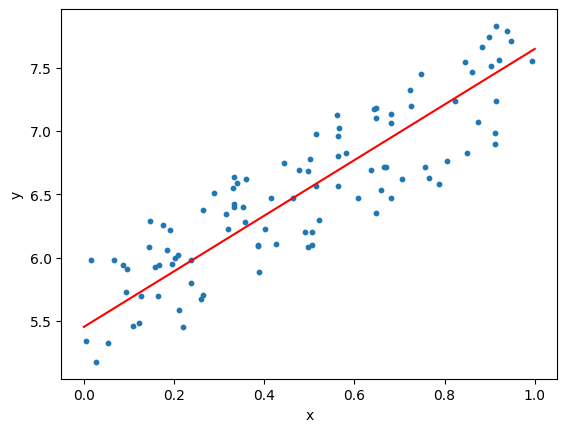

In [ ]:
# @title 6.2 Linear Regression
import torch
import torch.nn.functional as F

torch.manual_seed(0)

x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def predict(x):
    y = x @ W + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff ** 2) / N

lr = 0.1
iters = 100

for i in range(iters):
    y_hat = predict(x)
    # loss = mean_squared_error(y, y_hat)
    loss = F.mse_loss(y, y_hat)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 20 == 0: # print every 20 iterations
        print(f"{i}-iter loss:{loss.item()}")

print(f"final loss : {loss.item()}")
print('====')
print('W =', W.item())
print('b =', b.item())

import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
x = torch.tensor([[0.0], [1.0]])
y = W.detach().numpy() * x.detach().numpy() + b.detach().numpy()
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


==Model with Parameter
Parameter containing:
tensor([[0.]], requires_grad=True) torch.Size([1, 1])
Parameter containing:
tensor([0.], requires_grad=True) torch.Size([1])

==Model with Linear layer
Parameter containing:
tensor([[-0.4751]], requires_grad=True) torch.Size([1, 1])
Parameter containing:
tensor([-0.9183], requires_grad=True) torch.Size([1])

==Training Model with Linear layer

0-iter loss:45.458229064941406
20-iter loss:0.08967967331409454
40-iter loss:0.08166984468698502
60-iter loss:0.07739628106355667
80-iter loss:0.07497884333133698


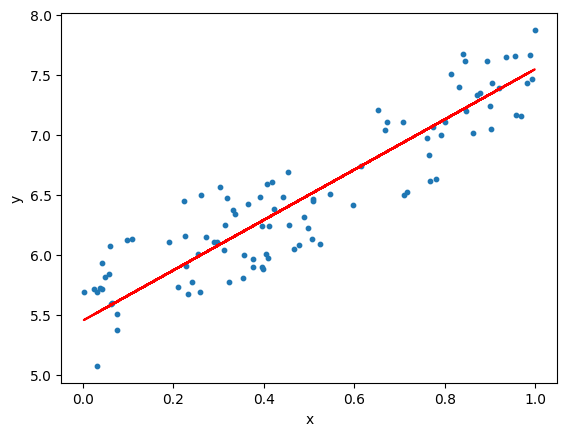

In [ ]:
# @title 6.3 Neural Network - Linear Equation

import torch
import torch.nn as nn

class ModelP(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.W = nn.Parameter(torch.zeros((1, 1)))
        self.b = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        y = x @ self.W + self.b
        return y

print("\n==Model with Parameter")
modelp = ModelP()
for param in modelp.parameters():
    print(param, param.shape)


class ModelN(nn.Module):
    def __init__(self, input_size = 1, output_size = 1) -> None:
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        y = self.linear(x)
        return y

print("\n==Model with Linear layer")
modeln = ModelN()
for param in modeln.parameters():
    print(param, param.shape)


# ----
print("\n==Training Model with Linear layer\n")
x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

lr = 0.1
iters = 100

modeln = ModelN()
optimizer = torch.optim.SGD(modeln.parameters(), lr = lr)

for i in range(iters):
    y_hat = modeln(x)
    loss = nn.functional.mse_loss(y, y_hat)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i % 20 == 0: # print every 20 iterations
        print(f"{i}-iter loss:{loss.item()}")


import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
y_hat = modeln(x)
plt.plot(x.detach().numpy(), y_hat.detach().numpy(), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

0-iter lossL:0.5820791125297546, lossNL:0.6861962080001831
1000-iter lossL:0.2419198602437973, lossNL:0.23718556761741638
2000-iter lossL:0.2419198602437973, lossNL:0.23304222524166107
3000-iter lossL:0.2419198602437973, lossNL:0.22301353514194489
4000-iter lossL:0.2419198602437973, lossNL:0.19508163630962372
5000-iter lossL:0.2419198602437973, lossNL:0.13198284804821014
6000-iter lossL:0.2419198602437973, lossNL:0.0872020497918129
7000-iter lossL:0.2419198602437973, lossNL:0.08259838074445724
8000-iter lossL:0.2419198602437973, lossNL:0.0820966437458992
9000-iter lossL:0.2419198602437973, lossNL:0.08179449290037155


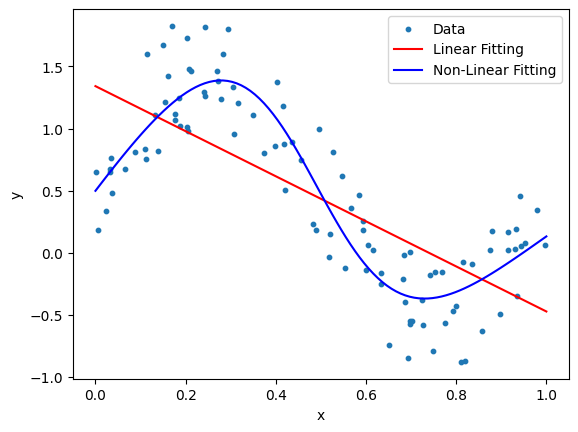

In [ ]:
# @title 6.4 Neural Network Non-Linear Equation

import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2* torch.pi * x) + torch.rand(100, 1)


class ModelL(nn.Module):
    def __init__(self, input_size = 1, output_size = 1) -> None:
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        y = self.linear(x)
        return y

class ModelNL(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 10, output_size = 1) -> None:
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        y = self.linear1(x)
        y = F.sigmoid(y)
        y = self.linear2(y)
        return y

lr = 0.2
iters = 10000

modelL = ModelL()
optimizerL = torch.optim.SGD(modelL.parameters(), lr = lr)

modelNL = ModelNL()
optimizerNL = torch.optim.SGD(modelNL.parameters(), lr = lr)

for i in range(iters):
    # Training Linear Model
    yl_hat = modelL(x)
    lossL = F.mse_loss(y, yl_hat)

    lossL.backward()
    optimizerL.step()
    optimizerL.zero_grad()

    # Training Non-Linear Model
    ynl_hat = modelNL(x)
    lossNL = F.mse_loss(y, ynl_hat)

    lossNL.backward()
    optimizerNL.step()
    optimizerNL.zero_grad()

    if i % 1000 == 0: # print every 20 iterations
        print(f"{i}-iter lossL:{lossL.item()}, lossNL:{lossNL.item()}")




import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10, label='Data')

x = torch.linspace(0, 1, 100).reshape(-1, 1)

y_l = modelL(x).detach().numpy()
plt.plot(x, y_l, color='red',label='Linear Fitting')

y_nl = modelNL(x).detach().numpy()
plt.plot(x, y_nl, color='blue',label='Non-Linear Fitting')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



0.21.0+cu124
== Loading with PIL Image
size  : 60000
type  : <class 'PIL.Image.Image'>
lable : 5


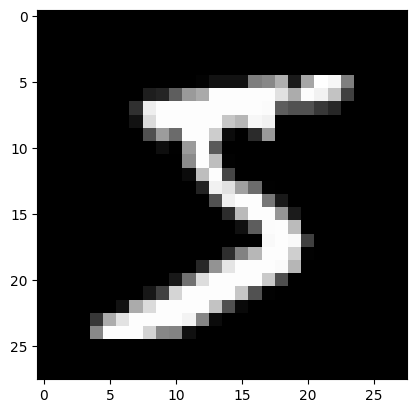


== Loading with torch.Tensor()
size  : 60000
type  : <class 'torch.Tensor'>
lable : 5


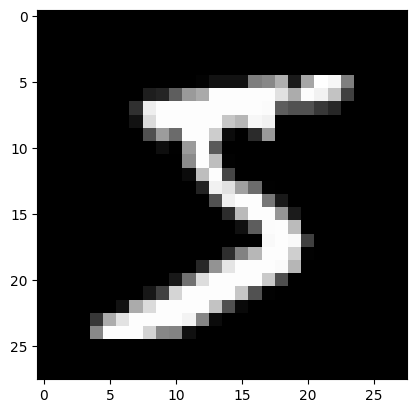


== Data Loader
x shape: torch.Size([32, 1, 28, 28])
label shape: torch.Size([32])


In [ ]:
# @title 6.5 TorchVision
import torchvision
print(torchvision.__version__)

import matplotlib.pyplot as plt

#-------
print("== Loading with PIL Image")
dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
x, label = dataset[0]
print(f"size  : {len(dataset)}")
print(f"type  : {type(x)}")
print(f"lable : {label}")

plt.imshow(x, cmap='gray')
plt.show()

#-------
import torchvision.transforms as T

print("\n== Loading with torch.Tensor()")
dataset = torchvision.datasets.MNIST(root = './data',
                                     train = True,
                                     transform = T.ToTensor(),
                                     download=True)
x, label = dataset[0]
print(f"size  : {len(dataset)}")
print(f"type  : {type(x)}")
print(f"lable : {label}")

img = T.ToPILImage()(x)
plt.imshow(img, cmap='gray')
plt.show()

# ------

print("\n== Data Loader")

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

# for x, lable in dataloader:
#     print(f"x shape: {x.shape}")
#     print(f"label shape: {lable.shape}")
#     break
x, label = next(iter(dataloader))
print(f"x shape: {x.shape}")
print(f"label shape: {label.shape}")